In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
#Generate an image
# A 200x200 image with a big white square at the centre
image = np.zeros((200, 200), dtype=np.uint8)

####--- parameters --------
line_color = 255
line_width = 20

#---- horizontal and vertical begin --------#
h_begin = 50
h_end = 150
v_begin = 50
v_end = 150

vm_begin = 100 - int(line_width/2)
vm_end = 100 + int(line_width/2)
#------------------------------------------------

# Draw the letter H
# left vertical strip
image[v_begin:v_end, h_begin:(h_begin+line_width)] = line_color

# right vertical strip
image[v_begin:v_end, (h_end-line_width):h_end] = line_color

# middle strip
image[vm_begin:vm_end, h_begin:h_end] = line_color

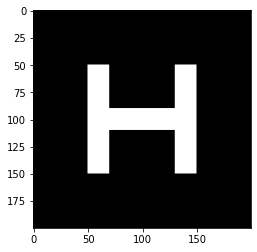

In [3]:
#show image
#plt.imshow(image)
plt.imshow(image, cmap='gray')

In [4]:
# generate the sobel filters   

In [5]:
# x-kernel 
sobelx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

#y-kernel
sobely = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]])

In [6]:
# Get the first derivative Ix
Ix = signal.convolve2d(image, sobelx, "same")
Iy = signal.convolve2d(image, sobely, "same")

#--- scale non-zero values to 255
Ix[Ix != 0] = 255
Iy[Iy != 0] = 255

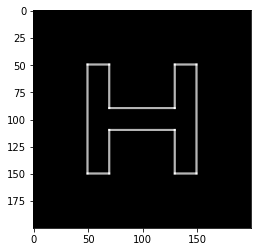

In [7]:
##----- Sobel
#-- Find the sobel operator Sobel=sqrt( Ix*Ix + Iy*Iy )

Sobel = np.sqrt( (Ix*Ix) + (Iy*Iy) )
#plt.imshow(image)
plt.imshow(Sobel, cmap='gray')

In [8]:
# Get the second derivative Ixx 
# To get second derivative differentiate twice.
Ixx = signal.convolve2d(Ix, sobelx, "same")     
# Iyy  
Iyy = signal.convolve2d(Iy, sobely, "same")
# Ixy Image 
Ixy = signal.convolve2d(Ix, sobely, "same")

In [9]:
#Finally calculate Harris operator
# the Herssian matrix
Hm = np.array([[Ixx, Ixy],[Ixy, Iyy]])

In [10]:
# Get Determinant and trace 
det = Ixx*Iyy - Ixy**2
det2 = np.linalg.det(Hm)

# trace is the sum of the diagonal elements
trace = Ixx + Iyy
trace2 = np.trace(Hm)

# Harris is det(H) - a * trace(H) let a = 0.2 , 
H = det - 0.2 * trace

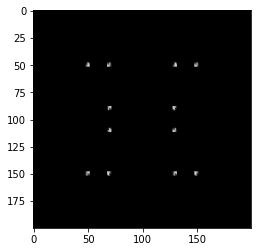

In [12]:
plt.imshow(np.abs(H), cmap='gray')
plt.show()